#Pipeline with Spacy - Yeld+Amazon+Imdb

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/nlp-pipeline.png" width="1200">

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/yelp_labelled.txt
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/amazon_cells_labelled.txt
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/imdb_labelled.txt

--2022-04-09 07:12:30--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/yelp_labelled.txt
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.142.30
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.142.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61320 (60K) [text/plain]
Saving to: ‘yelp_labelled.txt’

yelp_labelled.txt   100%[===================>]  59.88K  --.-KB/s    in 0.1s    

2022-04-09 07:12:31 (627 KB/s) - ‘yelp_labelled.txt’ saved [61320/61320]

--2022-04-09 07:12:31--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/nlp/amazon_cells_labelled.txt
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.142.30
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.142.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58226 (57K) [text/plain]
Saving to

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
yelp_ds = pd.read_csv('yelp_labelled.txt', sep ='\t', header = None, names = ['reviews', 'sentiment'])
amazon_ds = pd.read_csv('amazon_cells_labelled.txt', sep ='\t', header = None, names = ['reviews', 'sentiment'])
imdb_ds = pd.read_csv('imdb_labelled.txt', sep ='\t', header = None, names = ['reviews', 'sentiment'])

df = pd.concat([yelp_ds, amazon_ds, imdb_ds], ignore_index = True)
df

,reviews,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2743,I just got bored watching Jessice Lange take h...,0
2744,"Unfortunately, any virtue in this film's produ...",0
2745,"In a word, it is embarrassing.",0
2746,Exceptionally bad!,0


In [4]:
df.isnull().sum()

reviews      0
sentiment    0
dtype: int64

In [5]:
import re

def clean_special_patterns(text):
    """Remove special patterns - email, url, date etc."""
    html_regex = re.compile(r"<.*?>")
    email_regex = re.compile(r"[\w.-]+@[\w.-]+")
    url_regex = re.compile(r"(http|www)[^\s]+")
    date_regex = re.compile(r"[\d]{2,4}[ -/:]*[\d]{2,4}([ -/:]*[\d]{2,4})?") # a way to match date
    new_line = re.compile(r"/(\r\n)+|\r+|\n+|\t+/")
    number = re.compile(r"[\d+]")
    under = re.compile(r"[^a-zA-Z0-9:$-,%.?!]+")
    simbols = re.compile(r"[^\w\s/'/`]")
    spaces = re.compile(r"\s{2,}")
    remove_singlelett= re.compile(r"(^| ).( |$)")

    ## remove
    text = text.lower()
    text = number.sub(" ", text)
    text = html_regex.sub(" ", text)
    text = url_regex.sub(" ", text)
    text = email_regex.sub(" ", text)
    text = date_regex.sub(" ", text)
    text = new_line.sub(" ", text)
    text = under.sub(" ", text)
    text = simbols.sub(" ", text)
    text = spaces.sub(" ", text)
    text = text.replace("`", "'")
    text = remove_singlelett.sub("",text)
    return text

In [6]:
#Applichiamo la funzione di cleaning all in once
df["reviews"] = df["reviews"].apply(clean_special_patterns)
df

,reviews,sentiment
0,wow loved this place,1
1,crust is not good,0
2,not tasty and the texture was just nasty,0
3,stopped by during the late may bank holiday of...,1
4,the selection on the menu was great and so wer...,1
...,...,...
2743,just got bored watching jessice lange take her...,0
2744,unfortunately any virtue in this film's produc...,0
2745,inword it is embarrassing,0
2746,exceptionally bad,0


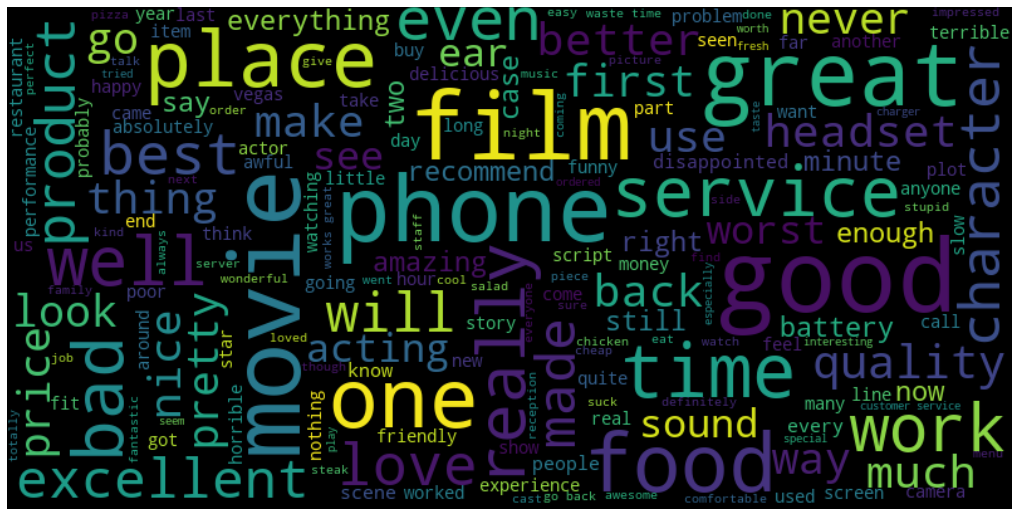

<Figure size 432x288 with 0 Axes>

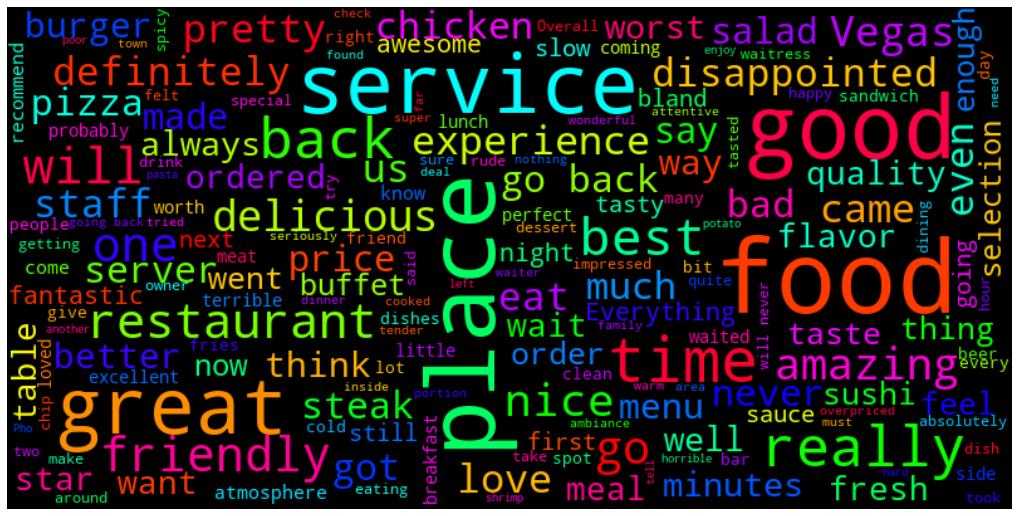

<Figure size 432x288 with 0 Axes>

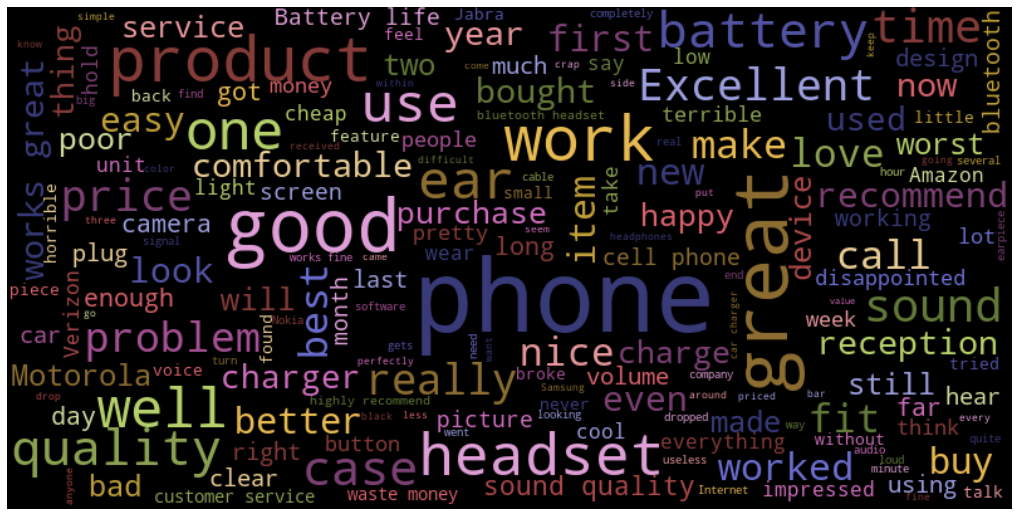

<Figure size 432x288 with 0 Axes>

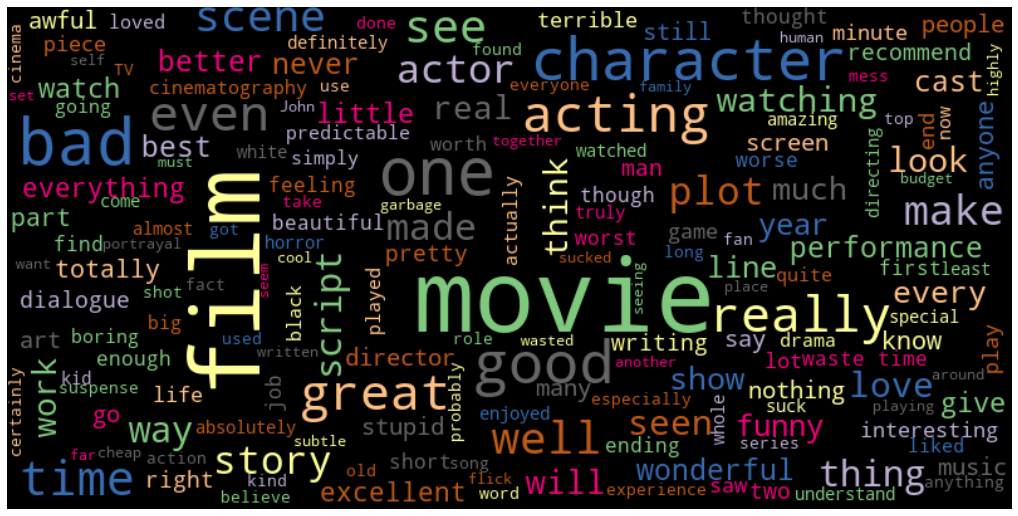

<Figure size 432x288 with 0 Axes>

In [7]:
total = ' '.join(review for review in df.reviews)
yelp = ' '.join(review for review in yelp_ds.reviews)
amazon = ' '.join(review for review in amazon_ds.reviews)
imdb = ' '.join(review for review in imdb_ds.reviews)

# Importing the libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt, seaborn as sb

# Function to create a word cloud object from the text with the color map as passed
def generateWordCloud(text: str, cmap: str):
    """
    Return a Word Cloud object generated from the corpus and color map parameter.
    """
    wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      colormap = cmap, max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      random_state = 0)

    wordcloud.generate(text)

    plt.figure(figsize=(18,10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.figure()

    return wordcloud
 
# Generate the Word Clouds for each of the Corpuses and save them as a PNG file
generateWordCloud(text = total, cmap = 'viridis').to_file('dataset_wc.png')
generateWordCloud(text = yelp, cmap = 'hsv').to_file('yelp_wc.png')
generateWordCloud(text = amazon, cmap = 'tab20b').to_file('amazon_wc.png')
generateWordCloud(text = imdb, cmap = 'Accent').to_file('imdb_wc.png')

In [8]:
df['sentiment'].unique()

array([1, 0])

In [9]:
# DECLARE TARGET and FEATURES
X = df['reviews']
y = df['sentiment']

In [10]:
from sklearn.model_selection import train_test_split

#X = raw feature -(text) on string format 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state = 667
                                                    )

In [11]:
## Spacy Custom Pipeline
import numpy as np
import multiprocessing as mp

import string
import spacy 
from sklearn.base import TransformerMixin, BaseEstimator

nlp = spacy.load("en_core_web_sm")

class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self,
                 nlp = nlp,
                 n_jobs=1):
        """
        Text preprocessing transformer includes steps:
            1. Punctuation removal
            2. Stop words removal
            3. Lemmatization

        nlp  - spacy model
        n_jobs - parallel jobs to run
        """
        self.nlp = nlp
        self.n_jobs = n_jobs

    def fit(self, X, y=None):
        return self

    def transform(self, X, *_):
        X_copy = X.copy()

        partitions = 1
        cores = mp.cpu_count()
        if self.n_jobs <= -1:
            partitions = cores
        elif self.n_jobs <= 0:
            return X_copy.apply(self._preprocess_text)
        else:
            partitions = min(self.n_jobs, cores)

        data_split = np.array_split(X_copy, partitions)
        pool = mp.Pool(cores)
        data = pd.concat(pool.map(self._preprocess_part, data_split))
        pool.close()
        pool.join()

        return data

    def _preprocess_part(self, part):
        return part.apply(self._preprocess_text)

    def _remove_punct(self, doc):
        return (t for t in doc if t.text not in string.punctuation)

    def _remove_stop_words(self, doc):
        return (t for t in doc if not t.is_stop)

    def _lemmatize(self, doc):
        return ' '.join(t.lemma_ for t in doc)

    def _preprocess_text(self, text):
        doc = self.nlp(text)
        removed_punct = self._remove_punct(doc)
        removed_stop_words = self._remove_stop_words(removed_punct)
        return self._lemmatize(removed_stop_words)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from sklearn.linear_model import  LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import  accuracy_score

text_preprocess = TextPreprocessor(n_jobs=-1)
bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
classifier = LogisticRegressionCV(cv=5,solver='saga',scoring='accuracy', n_jobs=-1, verbose=1)

#classifier = MultinomialNB()
#classifier = ComplementNB()
#classifier = BernoulliNB()


pipe  = Pipeline([
                ('normalize',text_preprocess),
                ('BOW',bow),
                ('TF-IDF',tfidf),
                ('classifier',classifier)
                ])

pipe.fit(X_train, y_train)

#accuracy on test data
y_pred = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred) 

print('Accuracy on test data : ', test_data_accuracy)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...rescaling...

rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...
rescaling...

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


Accuracy on test data :  0.730909090909091


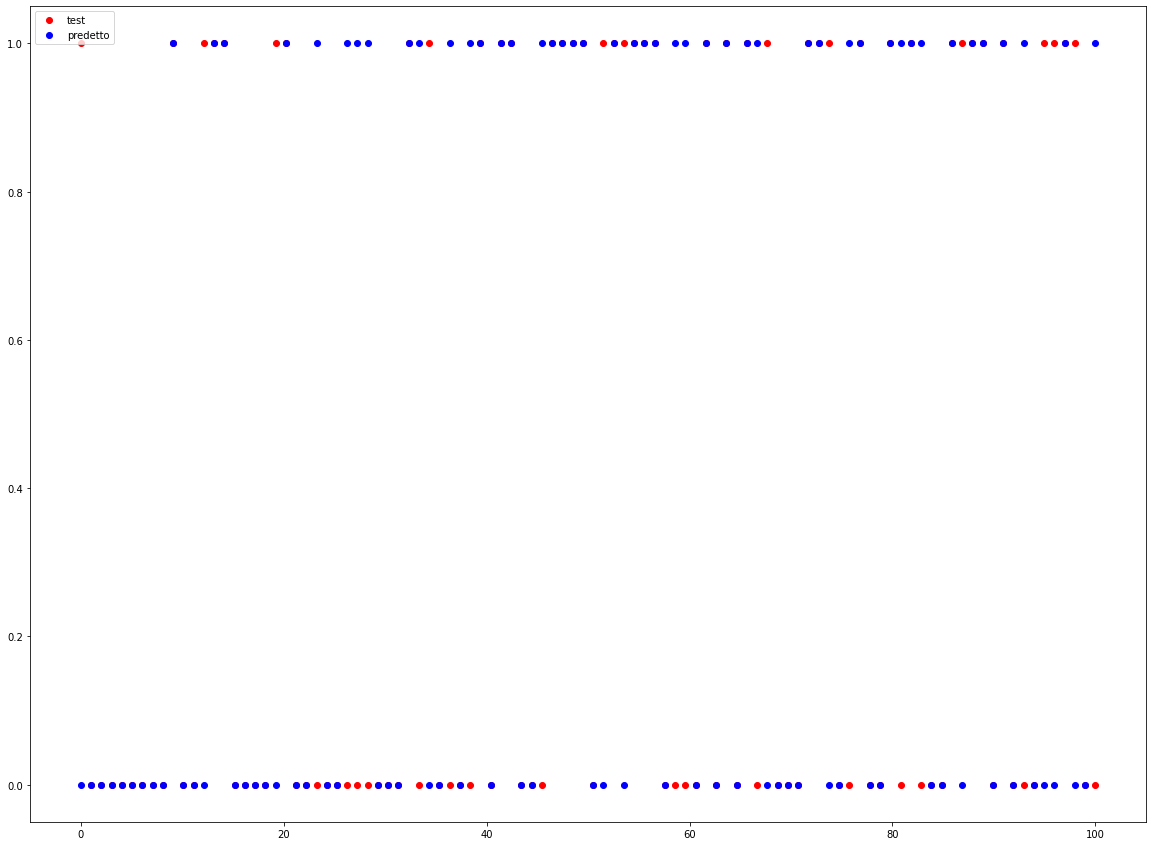

In [13]:
import matplotlib.pyplot as plt
lenght = 100
x = np.linspace(0,lenght,lenght)


plt.figure(figsize=(20,15))
plt.plot(x, y_test[0:lenght],'or', label='test')
plt.plot(x, y_pred[0:lenght], 'ob',label='predetto')
plt.legend(loc=2);

In [14]:
labels = ['Negative', 'Positive']

Text(69.0, 0.5, 'Predicted')

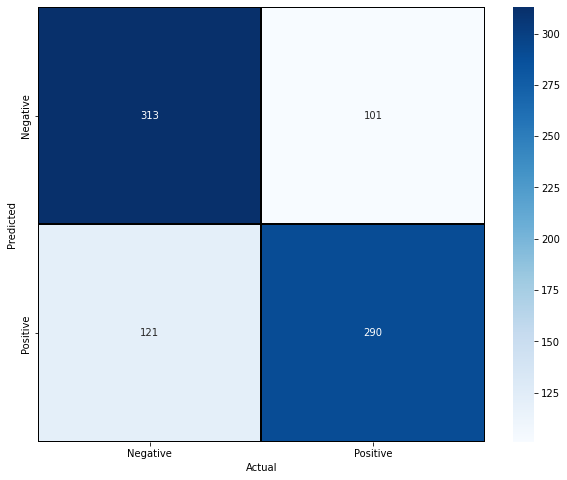

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Actual")
plt.ylabel("Predicted")

In [16]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

    Negative       0.72      0.76      0.74       414
    Positive       0.74      0.71      0.72       411

    accuracy                           0.73       825
   macro avg       0.73      0.73      0.73       825
weighted avg       0.73      0.73      0.73       825



In [17]:
!pip install plot-metric --quiet

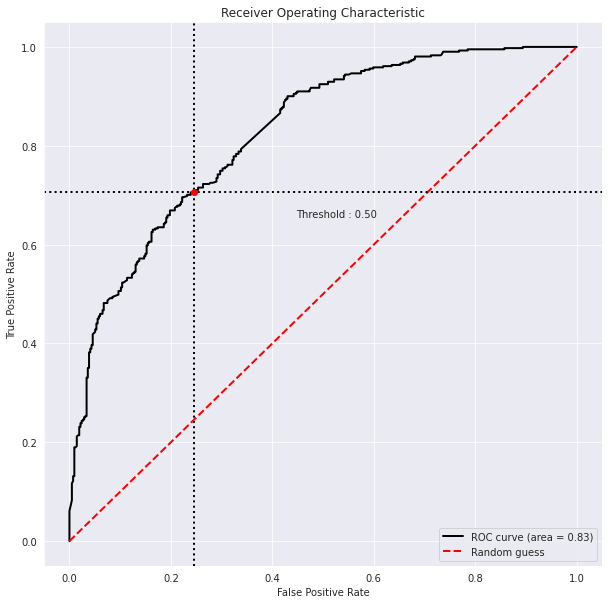

In [18]:
from plot_metric.functions import BinaryClassification
y_pred_proba = pipe.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

### Test on production

In [19]:
test = pd.Series({'text':'i love you'})

In [20]:
prediction = pipe.predict(test)
print(prediction[0])

if (prediction[0] == 0):
  print('Negative')
else:
  print('Positive')

1
Positive
